In [1]:
from keras.datasets import imdb
import numpy as np

Using TensorFlow backend.


In [2]:
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
  [(value,key) for (key,value) in word_index.items()]
)
decoded_review = ' '.join(
  [reverse_word_index.get(i - 3, '?') for i in train_data[0]] 
)

1646592/1641221 [==============================] - 0s 0us/step


In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i , sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [9]:
print(train_data)
x_train[0]

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

W0725 14:51:36.082806 140183818614656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 14:51:36.133350 140183818614656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 14:51:36.141341 140183818614656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

W0725 14:58:25.745119 140183818614656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.5048 - acc: 0.7873 - val_loss: 0.3775 - val_acc: 0.8705
Epoch 2/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.2991 - acc: 0.9047 - val_loss: 0.3000 - val_acc: 0.8899
Epoch 3/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.2173 - acc: 0.9283 - val_loss: 0.3081 - val_acc: 0.8714
Epoch 4/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1747 - acc: 0.9438 - val_loss: 0.2825 - val_acc: 0.8845
Epoch 5/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.1421 - acc: 0.9541 - val_loss: 0.2855 - val_acc: 0.8857
Epoch 6/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1147 - acc: 0.9651 - val_loss: 0.3164 - val_acc: 0.8775
Epoch 7/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.0978 - acc: 0.9708 - val_loss: 0.3130 - 

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

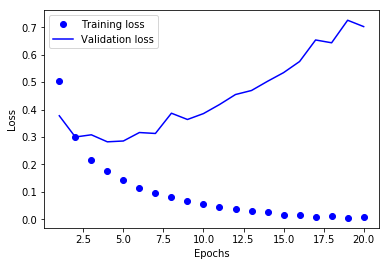

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1,len(acc)+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

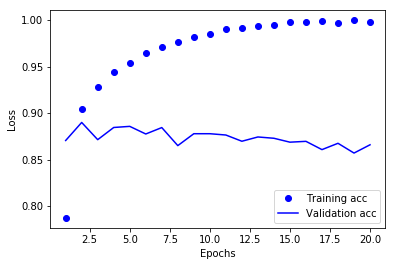

In [22]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [23]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 100us/step - loss: 0.4739 - acc: 0.8221
Epoch 2/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.2674 - acc: 0.9093
Epoch 3/4
25000/25000 [==============================] - 2s 85us/step - loss: 0.2030 - acc: 0.9284
Epoch 4/4
25000/25000 [==============================] - 2s 69us/step


In [24]:
results

[0.31040413264274597, 0.87684]

In [25]:
model.predict(x_test)

array([[0.16328835],
       [0.99984777],
       [0.4115538 ],
       ...,
       [0.08034152],
       [0.04932106],
       [0.4597845 ]], dtype=float32)

In [39]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

# history_dict = history.history
# print(history_dict.keys())

# loss_values = history_dict['loss']
# acc = history_dict['acc']

# epochs = range(1,len(acc)+1)
# plt.plot(epochs,loss_values,'bo',label='Loss')
# plt.plot(epochs,acc,'b',label='Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.show()


Epoch 1/4
25000/25000 [==============================] - 3s 123us/step - loss: 0.5089 - acc: 0.8040
Epoch 2/4
25000/25000 [==============================] - 2s 88us/step - loss: 0.2801 - acc: 0.9045
Epoch 3/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.2102 - acc: 0.9238
Epoch 4/4
25000/25000 [==============================] - 2s 81us/step
[0.3123650647735596, 0.87772]


In [28]:
model.predict(x_test)

array([[0.19916692],
       [0.9983883 ],
       [0.86304176],
       ...,
       [0.1165936 ],
       [0.06776282],
       [0.6218587 ]], dtype=float32)

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 3s 121us/step - loss: 0.1500 - acc: 0.8169
Epoch 2/4
25000/25000 [==============================] - 2s 88us/step - loss: 0.0760 - acc: 0.9079
Epoch 3/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.0565 - acc: 0.9321
Epoch 4/4
25000/25000 [==============================] - 2s 74us/step


[0.09077471504926682, 0.8774]

In [30]:
model.predict(x_test)

array([[0.12223172],
       [0.99965155],
       [0.7270081 ],
       ...,
       [0.22185597],
       [0.05953953],
       [0.48915294]], dtype=float32)

In [31]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 4s 154us/step - loss: 0.1379 - acc: 0.8114
Epoch 2/4
25000/25000 [==============================] - 3s 129us/step - loss: 0.0714 - acc: 0.9115
Epoch 3/4
25000/25000 [==============================] - 3s 125us/step - loss: 0.0536 - acc: 0.9321
Epoch 4/4
25000/25000 [==============================] - 3s 101us/step


[0.09308320769071579, 0.87504]

In [32]:
model.predict(x_test)

array([[0.13769764],
       [0.9996594 ],
       [0.99307376],
       ...,
       [0.24089503],
       [0.1150468 ],
       [0.64409053]], dtype=float32)

In [33]:
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 3s 138us/step - loss: 0.1304 - acc: 0.8192
Epoch 2/4
25000/25000 [==============================] - 3s 125us/step - loss: 0.0671 - acc: 0.9129
Epoch 3/4
25000/25000 [==============================] - 3s 123us/step - loss: 0.0534 - acc: 0.9310
Epoch 4/4
25000/25000 [==============================] - 3s 108us/step


[0.09677201085329055, 0.87384]

In [34]:
model.predict(x_test)

array([[0.07288727],
       [0.9996298 ],
       [0.996689  ],
       ...,
       [0.11068109],
       [0.06408817],
       [0.57376075]], dtype=float32)

In [51]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 4s 157us/step - loss: 0.1546 - acc: 0.8042
Epoch 2/4
25000/25000 [==============================] - 3s 104us/step - loss: 0.0757 - acc: 0.9102
Epoch 3/4
25000/25000 [==============================] - 3s 102us/step - loss: 0.0555 - acc: 0.9320
Epoch 4/4
25000/25000 [==============================] - 3s 106us/step


[0.09590271752357483, 0.87164]